In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data= pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')


In [4]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
data_decs= pd.read_excel("EastWestAirlines.xlsx")
data_decs

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [6]:
# dropping unwanted feature  
data.drop('ID#',axis=1,inplace=True)

In [7]:
data.shape

(3999, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [9]:
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(1)

In [11]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Visualizing 

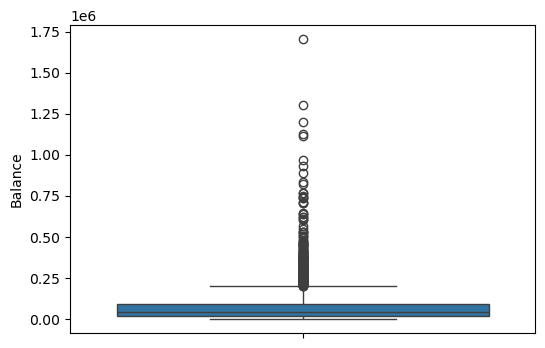

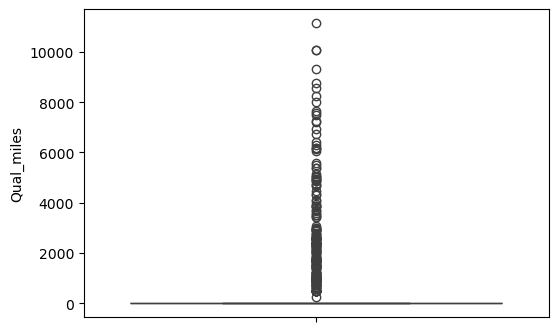

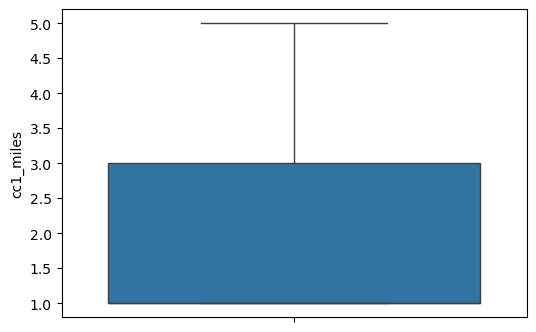

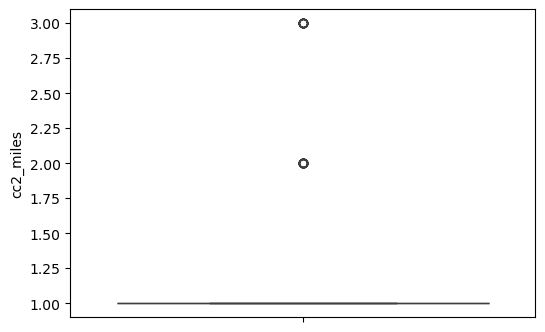

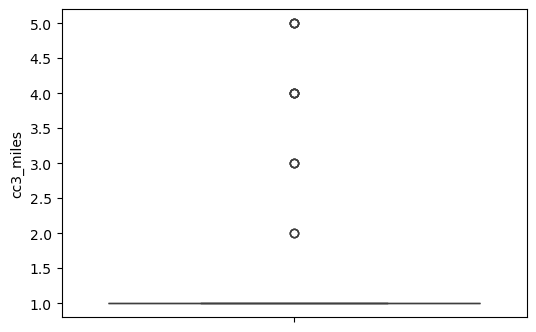

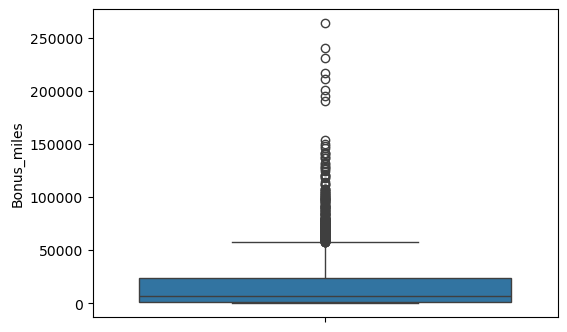

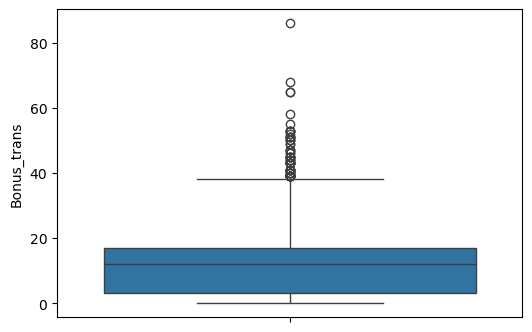

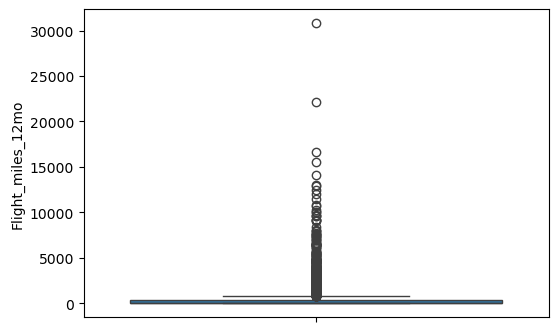

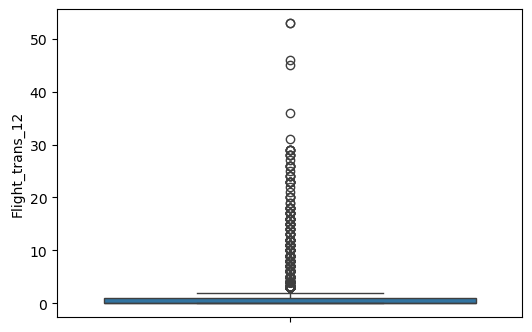

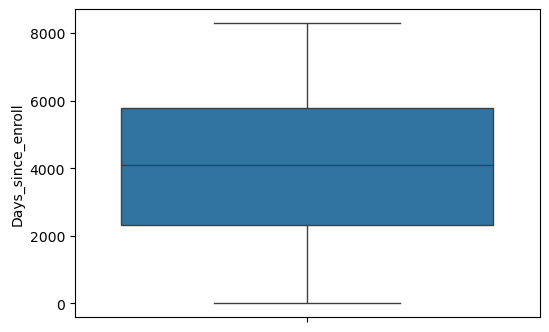

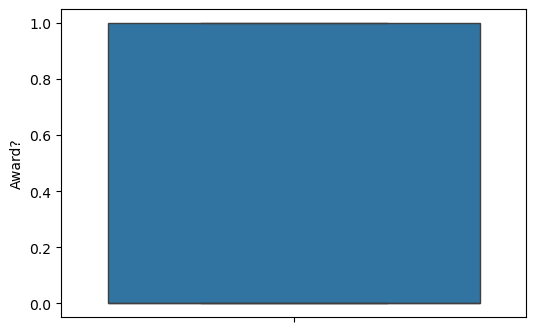

In [12]:
for i in data.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data[i])
    plt.show()

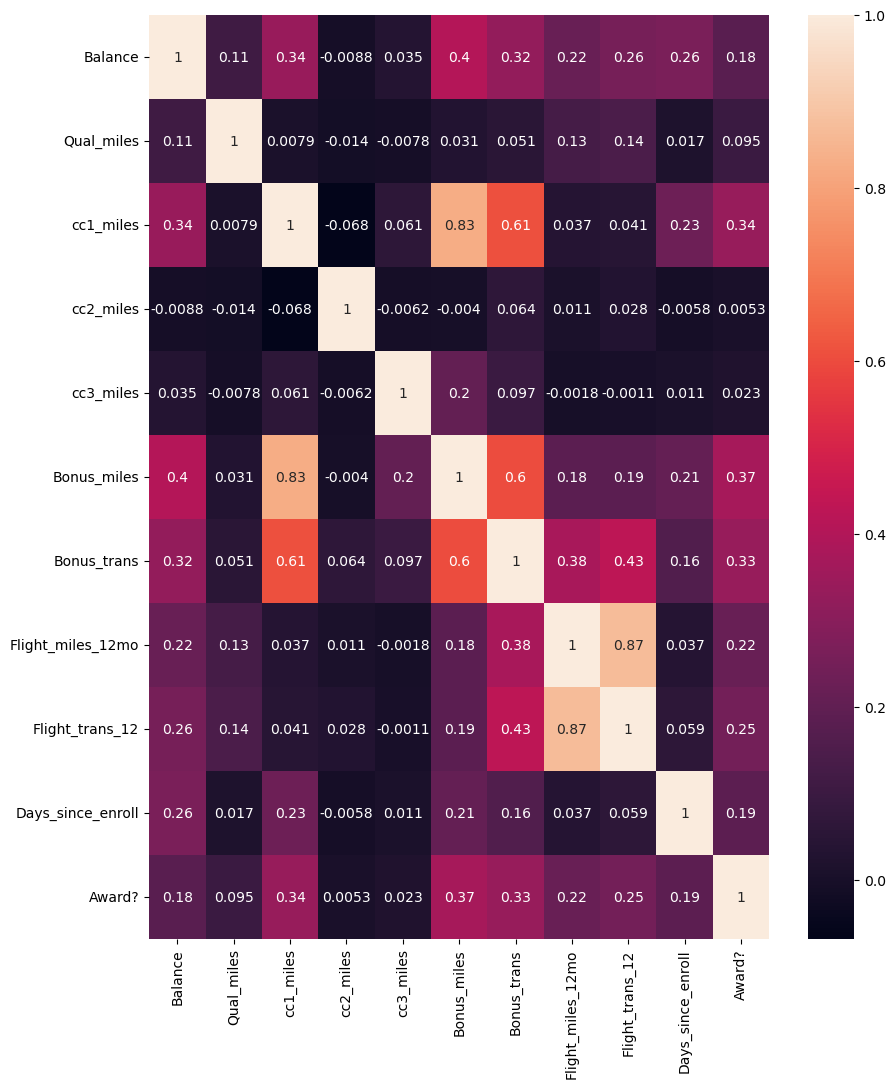

In [13]:
plt.figure(figsize=(10,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

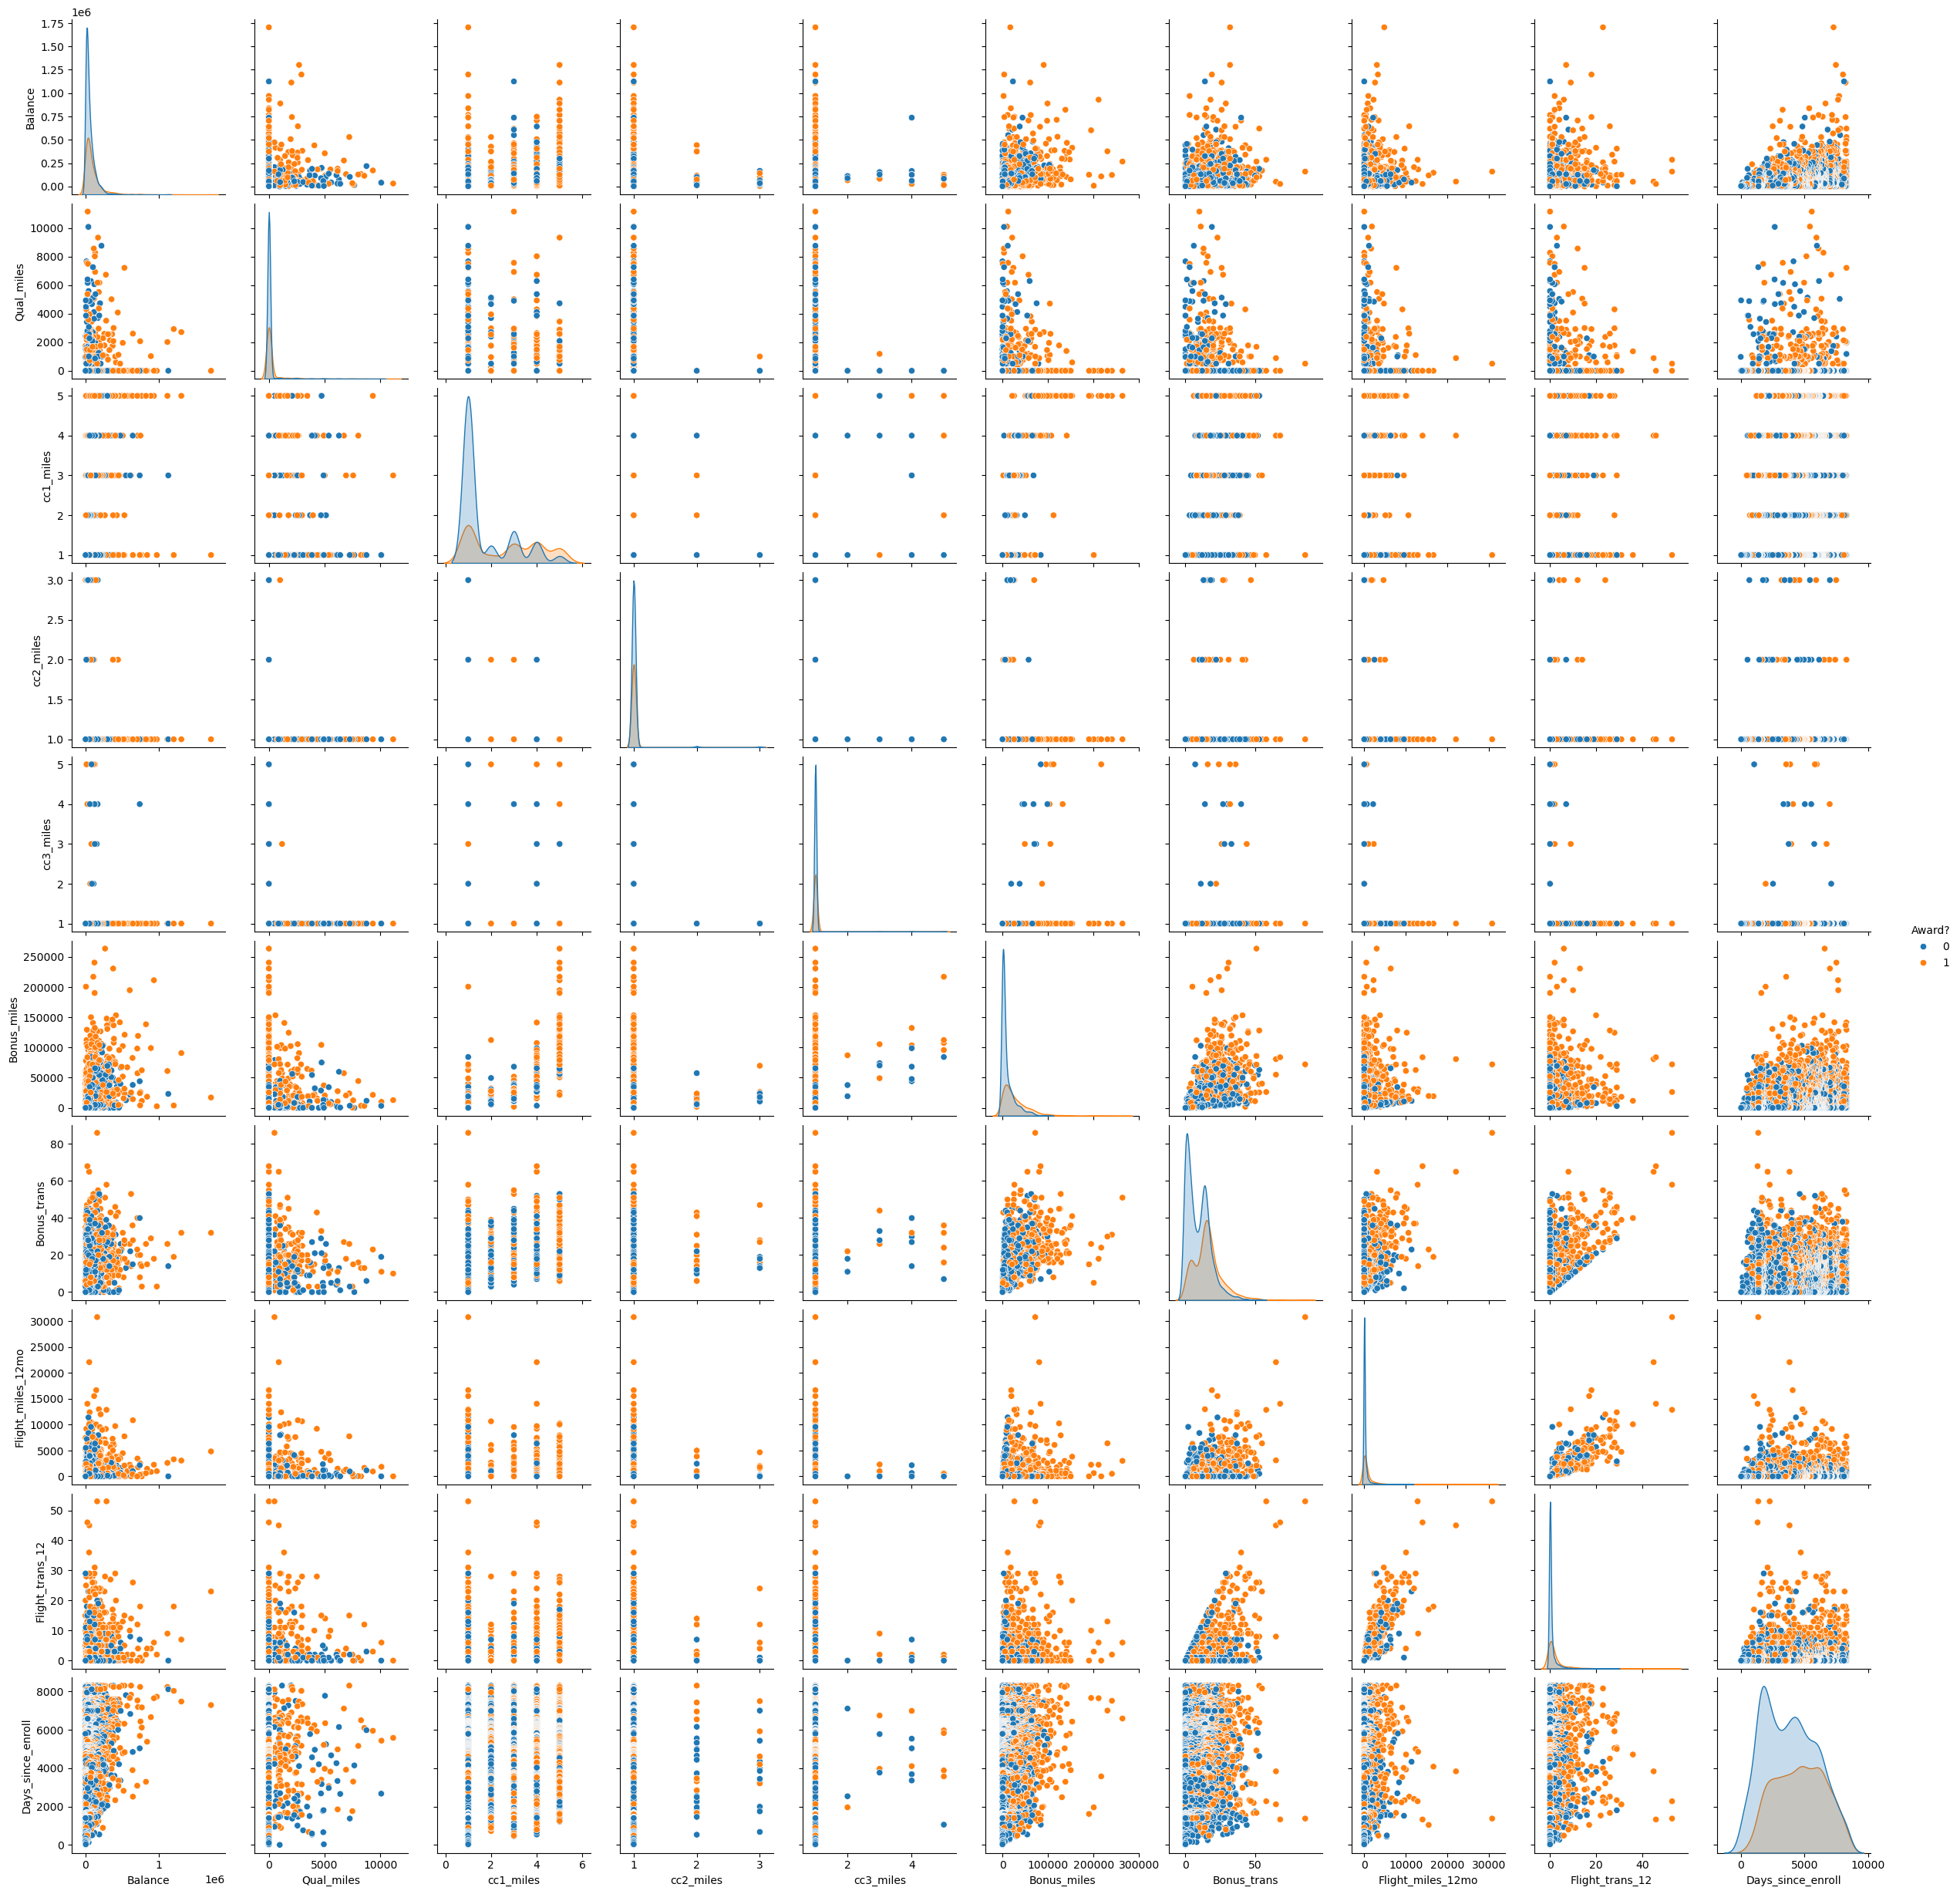

In [14]:
sns.pairplot(data, hue='Award?')

In [15]:
# Standardizing the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)


In [16]:
from sklearn.cluster import KMeans 

In [19]:
# pip install kneed 

# Featuring the data with PCA 

In [42]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components=6)
pca_transformed = pca_final.fit_transform(df_scaled)


In [43]:

print("Number of Feature on original data:",data.shape[1])
print("Number of Feature on PCA data:", pca_transformed.shape[1])


Number of Feature on original data: 11
Number of Feature on PCA data: 6


# K-Means Algorithm 

In [45]:
## Elbow method to select k calues 

wcss = []
for k in range (1,11):
    kmeans= KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # gives the Within-Cluster Sum of Squares (WCSS)

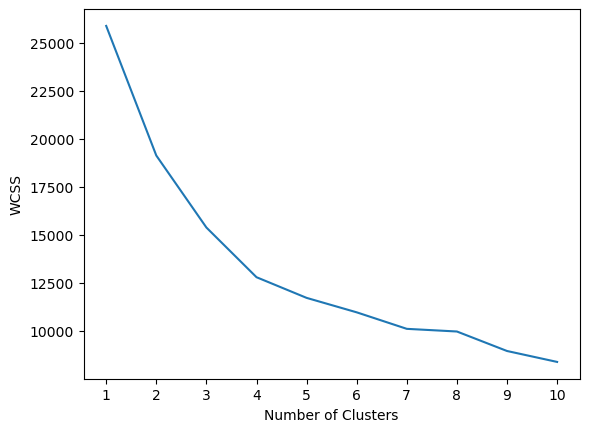

In [46]:
# selecting 
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show(
)

In [47]:
import kneed  # kneed will return the suitable K value for Kmeans 
K= kneed.KneeLocator(range(1,11),wcss,curve='convex', direction='decreasing')
K.elbow

np.int64(4)

Taking k=4 as per kneed repo

In [65]:
 from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, random_state=42 , init='k-means++')
labels_k = kmeans.fit_predict(pca_transformed)

k_sil  = silhouette_score(pca_transformed, labels_k)
k_sil

np.float64(0.2733360361991884)

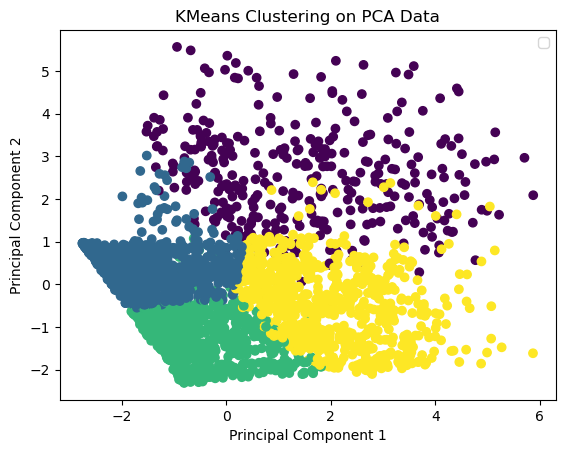

In [49]:
# visualizing the K-means
plt.figure()
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=labels_k, cmap='viridis')
plt.title('KMeans Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# # DBSCAN CLUSTERING


In [58]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.5, min_samples=4)
labels_db = db.fit_predict(pca_transformed)

# df_clean["DBSCAN_Cluster"] = db_pred


db_sil = silhouette_score(pca_transformed, labels_db)
print("Silhouette Score (DBSCAN):", db_sil)


Silhouette Score (DBSCAN): 0.24031480349487158


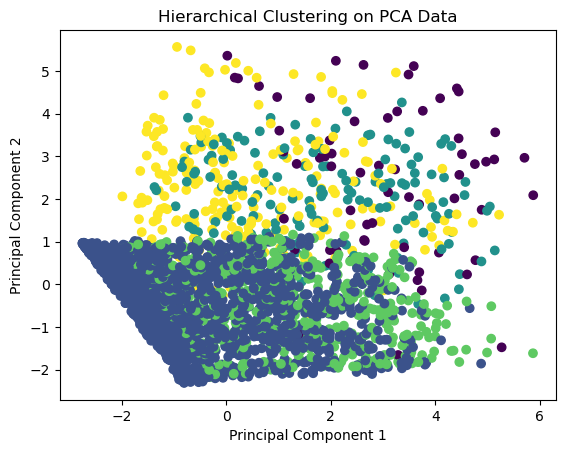

In [60]:
plt.figure()
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=labels_db, cmap='viridis')
plt.title('Hierarchical Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# HIERARCHICAL CLUSTERING


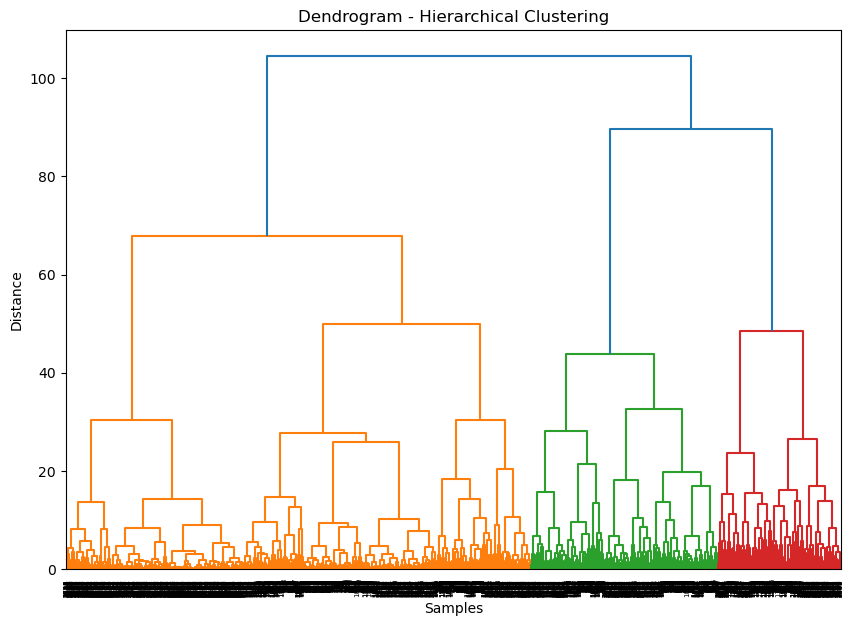

In [51]:
import scipy.cluster.hierarchy as  sc
plt.figure(figsize=(10, 7))

sc.dendrogram(sc.linkage(pca_transformed , method="ward"))
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering 
cluster=AgglomerativeClustering (n_clusters =5 , linkage='ward')
cluster.fit(pca_transformed)

AgglomerativeClustering(n_clusters=5)

In [53]:
lables_hie=cluster.labels_

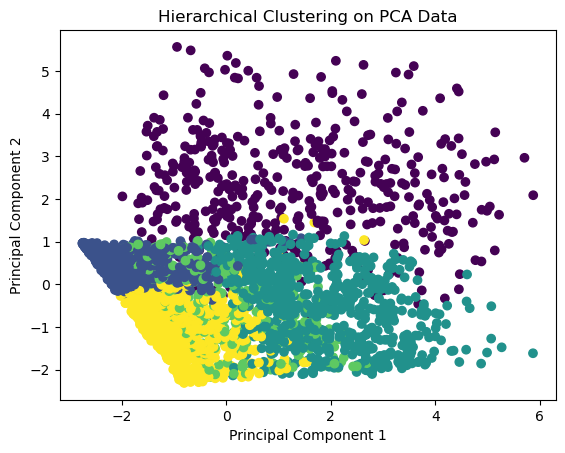

In [54]:
plt.figure()
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=lables_hie, cmap='viridis')
plt.title('Hierarchical Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [55]:
Hie_score= silhouette_score(pca_transformed, lables_hie)
Hie_score

np.float64(0.234702078677116)

In [ ]:
# comparing all the Culsters score 

In [68]:
print(f"Silhouette score for k means clustring : {k_sil : .3f} " )
print(f"Silhouette score for DBSCAN clustring : {db_sil : .3f} " )
print(f"Silhouette score for Hierarchical clustring : {Hie_score : .3f} " )

Silhouette score for k means clustring :  0.273 
Silhouette score for DBSCAN clustring :  0.240 
Silhouette score for Hierarchical clustring :  0.235 


# Based on the above comparison, there is not much difference between the scores, but K-Means clustering provides the best score among the three algorithms.